<a href="https://colab.research.google.com/github/girupashankar/Data_Analysis_Projects_Using_Python/blob/main/Healthcare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Healthcare Analysis   

## **Problem:**
* Traditional health monitoring systems often categorize patient health status using rigid, predefined thresholds that may not capture the nuanced variations across a diverse patient population.
* This can lead to oversimplified assessments and potentially overlook subtle yet critical patterns in health data.  
* The challenge is to develop a more dynamic and responsive approach that utilizes unsupervised learning to identify natural groupings within health data, facilitating personalized and precise health management.

**Expected Outcomes:**  
* **Identified Clusters:**  
    * Distinct patient groups based on
    health metrics, each with unique Characteristics that provide insight into their specific health needs.  
* **Personalized Health Insights:**    
    * Enhanced understanding of patient health requirements and risks, enabling tailored intervention strategies.  
* **Improved Health Monitoring:**
    * Recommendations for targeted monitoring and intervention strategies that cater to the specific needs of each cluster, leading to more effective health management and better patient outcomes.


**Contect the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load the Healthcare dataset

In [3]:
import pandas as pd
health_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/Data Analysis/Healthcare Analysis/healthmonitoring.csv")

## Step 2: Data Analysis

In [4]:
health_data

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,61,Male,85.077820,135/76,22,98.243780,walking,NaN,poor,moderate,2024-04-25 00:13:55.288556
496,497,62,Female,99.925508,130/85,14,98.859537,running,97.0,excellent,moderate,2024-04-25 00:08:55.288558
497,498,49,Female,98.619323,120/80,16,98.228169,running,99.0,good,moderate,2024-04-25 00:03:55.288560
498,499,62,Male,99.248763,130/85,14,97.185764,resting,NaN,poor,low,2024-04-24 23:58:55.288562


In [ ]:
print(health_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         500 non-null    int64  
 1   Age               500 non-null    int64  
 2   Gender            500 non-null    object 
 3   HeartRate         500 non-null    float64
 4   BloodPressure     500 non-null    object 
 5   RespiratoryRate   500 non-null    int64  
 6   BodyTemperature   482 non-null    float64
 7   ActivityLevel     500 non-null    object 
 8   OxygenSaturation  337 non-null    float64
 9   SleepQuality      500 non-null    object 
 10  StressLevel       500 non-null    object 
 11  Timestamp         500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB
None


In [5]:
print(health_data.shape)

(500, 12)


Observation 🤔:   
The given dataset contains several health-related metrics for different patients, organized in the following columns:

* **PatientID**: Numerical identifier for the patient.
* **Age**: Age of the patient in years.
* **Gender**: Gender of the patient.
* **HeartRate**: Heart rate in beats per minute.
* **BloodPressure**: Blood pressure readings, formatted inconsistently.
* **RespiratoryRate**: Respiratory rate in breaths per minute.
* **BodyTemperature**: Body temperature in Fahrenheit.
* **ActivityLevel**: Activity level at the time of the measurement.
* **OxygenSaturation**: Oxygen saturation percentage.
* **SleepQuality**: Quality of sleep reported by the patient.
* **StressLevel**: Reported level of stress.
* **Timestamp**: Date and time of the measurement.      

**The dataset includes health metrics from 500 individuals, featuring variables such as age, gender, heart rate, blood pressure, respiratory rate, body temperature, and oxygen saturation, recorded over a specific period.  
These variables provide a comprehensive snapshot of each patient’s health status, which is crucial for monitoring and managing various health conditions.**


> Let's have a look at whether the data contains any null values or not:


In [6]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

Observation ☁:   
So, the data contains null values in body temperature and oxygen saturation columns.

In [7]:
health_data.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,482.000000,337.000000
mean,250.500000,51.146000,80.131613,17.524000,98.583458,96.439169
std,144.481833,19.821566,9.606273,3.382352,0.470033,1.698216
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.274100,95.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.938284,98.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


>Here, I am observed the BodyTemperature and OxygenSaturation having similar percentage value of mean and 50% in Health data.

<ipython-input-8-83ec82c4f804>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health_data['BodyTemperature'], kde=True, kde_kws={'color': 'blue'}, color='green')


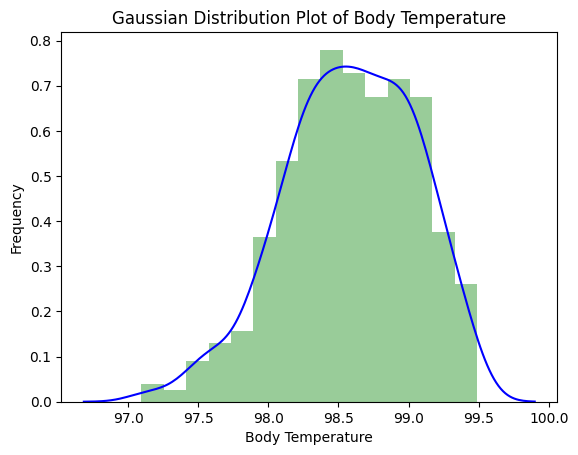

<ipython-input-8-83ec82c4f804>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health_data['OxygenSaturation'], kde=True, kde_kws={'color': 'blue'}, color='green')


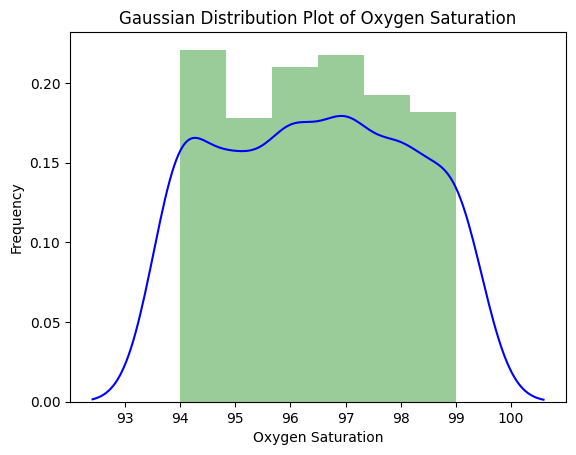

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Gaussian distribution plot for BodyTemperature
sns.distplot(health_data['BodyTemperature'], kde=True, kde_kws={'color': 'blue'}, color='green')
plt.title('Gaussian Distribution Plot of Body Temperature')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

# Create a Gaussian distribution plot for OxygenSaturation
sns.distplot(health_data['OxygenSaturation'], kde=True, kde_kws={'color': 'blue'}, color='green')
plt.title('Gaussian Distribution Plot of Oxygen Saturation')
plt.xlabel('Oxygen Saturation')
plt.ylabel('Frequency')
plt.show()


**Observation:** 🤔

**Body Temperature:**

 * The distribution of body temperature values appears to be approximately normal, with most values falling within the range of 96 to 99 degrees Fahrenheit.
 * However, there are a few outliers with values below 95 degrees Fahrenheit and above 100 degrees Fahrenheit.

**Oxygen Saturation:**

 * The distribution of oxygen saturation values is slightly skewed to the right, with most values falling between 95% and 100%.
 * There are a few outliers with values below 90% and above 100%.

In [9]:
# Replacing missing values in BodyTemperature with the median
health_data['BodyTemperature'].fillna(health_data['BodyTemperature'].median(), inplace=True)

# Replacing missing values in OxygenSaturation with the median
health_data['OxygenSaturation'].fillna(health_data['OxygenSaturation'].median(), inplace=True)


In [10]:
health_data.isna().sum()

PatientID           0
Age                 0
Gender              0
HeartRate           0
BloodPressure       0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
Timestamp           0
dtype: int64

> Next, we will examine summary statistics and the distribution of the numerical health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation). It will help us understand the typical values and the spread of the data. I’ll also include some visualizations to better understand these distributions:

In [11]:
sns.set(style="whitegrid")
# summary statistics
summary_stats = health_data.describe()
summary_stats

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


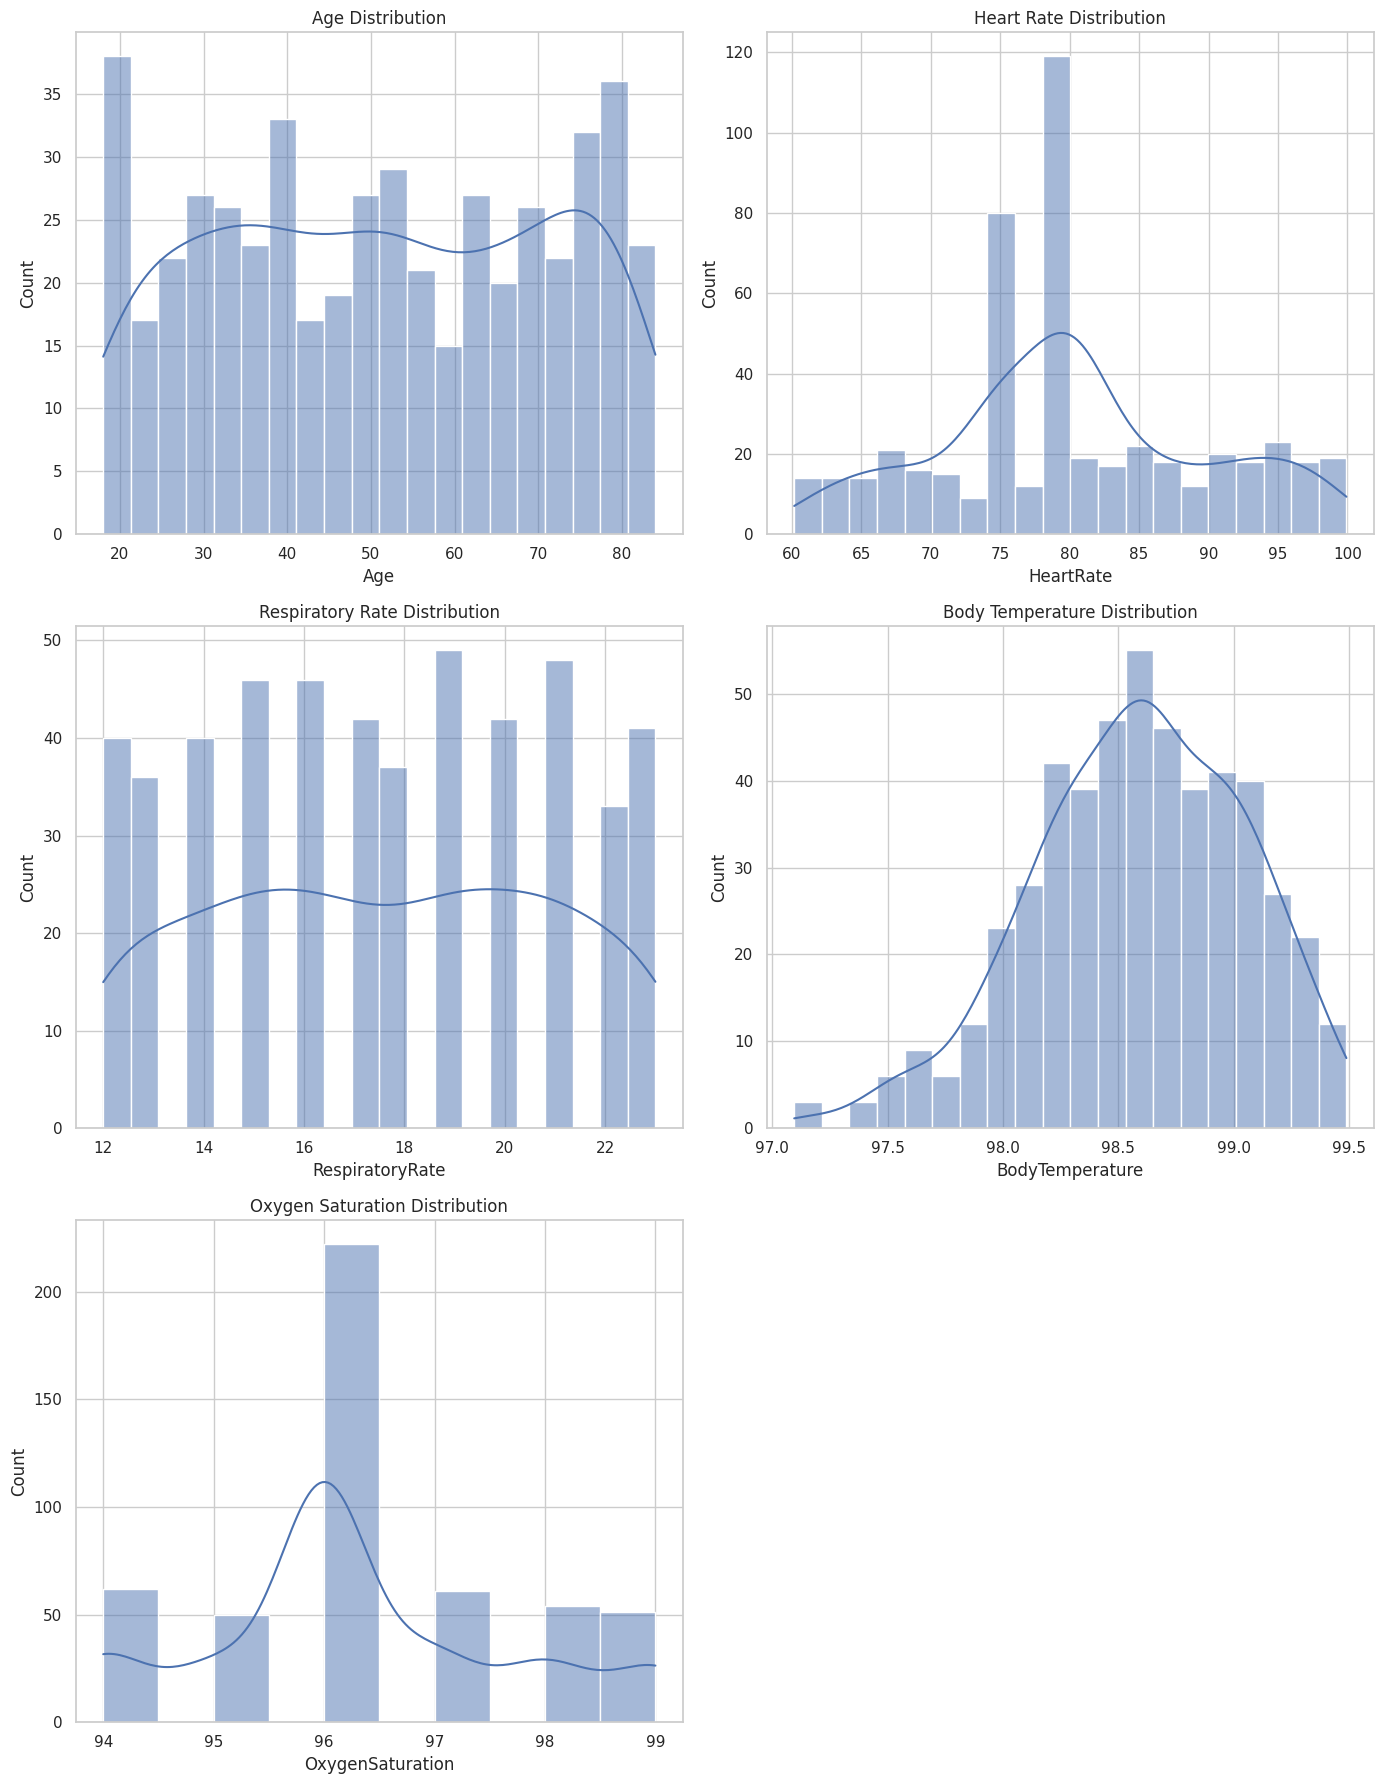

In [12]:
# plotting distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot

plt.tight_layout()
plt.show()


> Now, let's have a look at the gender distribution in the data and the correlation between the numerical columns in the dataset.

Gender
Male      256
Female    244
Name: count, dtype: int64
                       Age  HeartRate  RespiratoryRate  BodyTemperature  \
Age               1.000000  -0.055109         0.011530        -0.014600   
HeartRate        -0.055109   1.000000         0.079749         0.006981   
RespiratoryRate   0.011530   0.079749         1.000000         0.057665   
BodyTemperature  -0.014600   0.006981         0.057665         1.000000   
OxygenSaturation -0.099088   0.019462         0.036360        -0.001025   

                  OxygenSaturation  
Age                      -0.099088  
HeartRate                 0.019462  
RespiratoryRate           0.036360  
BodyTemperature          -0.001025  
OxygenSaturation          1.000000  


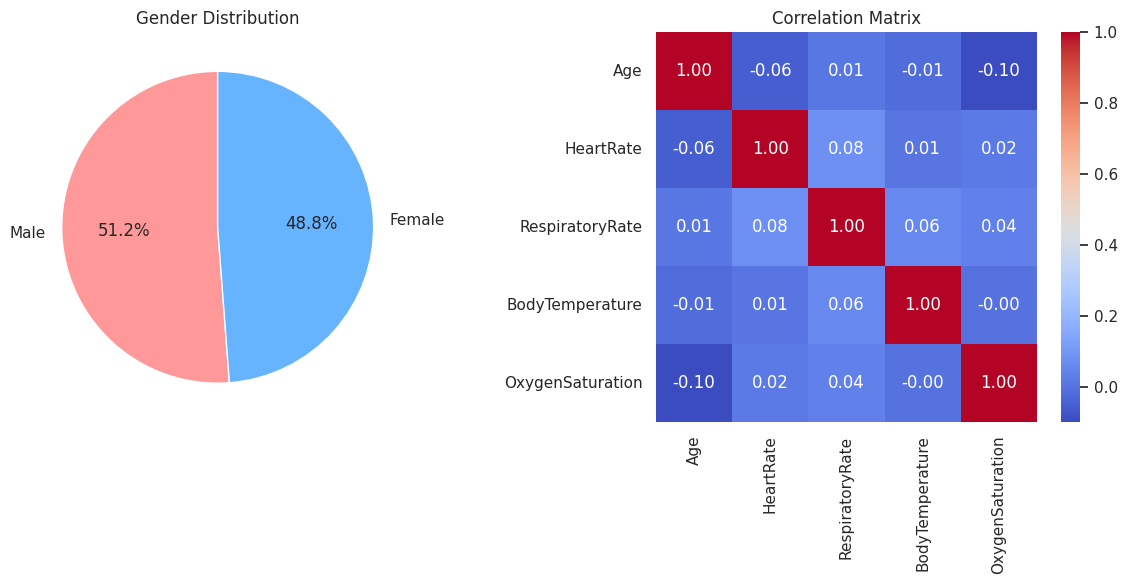

In [22]:
# Gender Distribution
gender_counts = health_data["Gender"].value_counts()
print(gender_counts)

# Correlation Matrix for numerical health metrics
correlation_matrix = health_data[["Age", "HeartRate", "RespiratoryRate", "BodyTemperature", "OxygenSaturation"]].corr()
print(correlation_matrix)

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind="pie", autopct="%1.1f%%", ax=axes[0], startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel("")
axes[0].set_title("Gender Distribution")

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Matrix")

plt.tight_layout()
plt.show()

In [27]:
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

# Assuming health_data is already defined

# Gender Distribution
gender_counts = health_data["Gender"].value_counts()

# Pie chart
fig1 = px.pie(values=gender_counts, names=gender_counts.index,
              title="Gender Distribution",
              color_discrete_sequence=['#ff9999','#66b3ff'])

# Correlation Matrix for numerical health metrics
correlation_matrix = health_data[["Age", "HeartRate", "RespiratoryRate", "BodyTemperature", "OxygenSaturation"]].corr()

# Heatmap
fig2 = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.index),
    y=list(correlation_matrix.columns),
    colorscale="Plasma",
    annotation_text=correlation_matrix.round(2).values
)

# Show the plots
fig1.show()
fig2.show()


**Observation 🌎:**  
* The pie chart indicates a nearly even split between male and female subjects in the dataset, with males comprising a slight majority at 51.2%.   
* Overall, the heatmap shows that the correlations between these health metrics are generally very weak, with most values close to zero. The strongest correlations are the perfect self-correlations (1.0). The weak negative correlation between Age and Oxygen Saturation suggests a potential slight decline in oxygen saturation with increasing age, but this is still a weak relationship.

>Now, let’s have a look at the heart rate by activity level

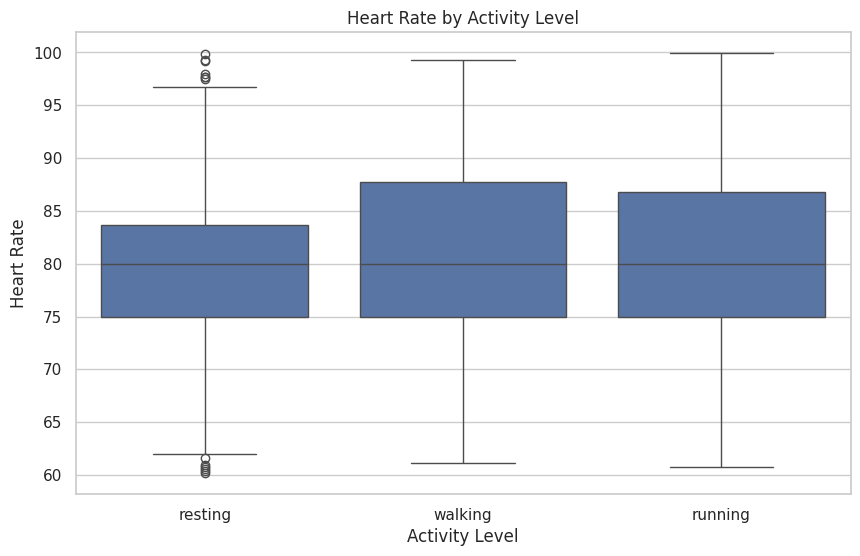

In [28]:
# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x="ActivityLevel", y="HeartRate", data=health_data)
plt.title("Heart Rate by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Heart Rate")
plt.show()

**Observation 🤔:**  
* It shows that the median heart rate increases from resting to walking, which is expected as physical activity increases.
*   However, the median heart rate does not significantly increase further during running compared to walking, which is unusual since we would expect a higher median heart rate for a more strenuous activity.  
* Additionally, there is considerable overlap in the interquartile ranges between walking and running, suggesting similar variability in heart rates for these activities within the sampled population.  
* The presence of outliers in the resting category indicates that some individuals have resting heart rates that are much higher than the typical range for the rest of the group.

> Now, let’s have a look at the distribution of blood pressure levels and some health metrics by gender.


- Blood pressure is a crucial indicator of cardiovascular health, reflecting the force of blood against the walls of your arteries as your heart pumps it around your body. It is typically measured using two numbers: systolic and diastolic pressures.

- **Systolic Pressure:** This is the top number and represents the pressure in your arteries when your heart beats.
- **Diastolic Pressure:** This is the bottom number and indicates the pressure in your arteries when your heart is at rest between beats.

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  SystolicBP  DiastolicBP  
0  2024-04-26 17:28:55.286711         130

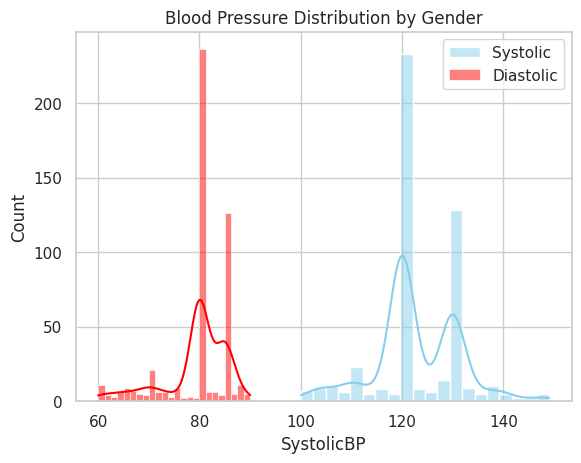

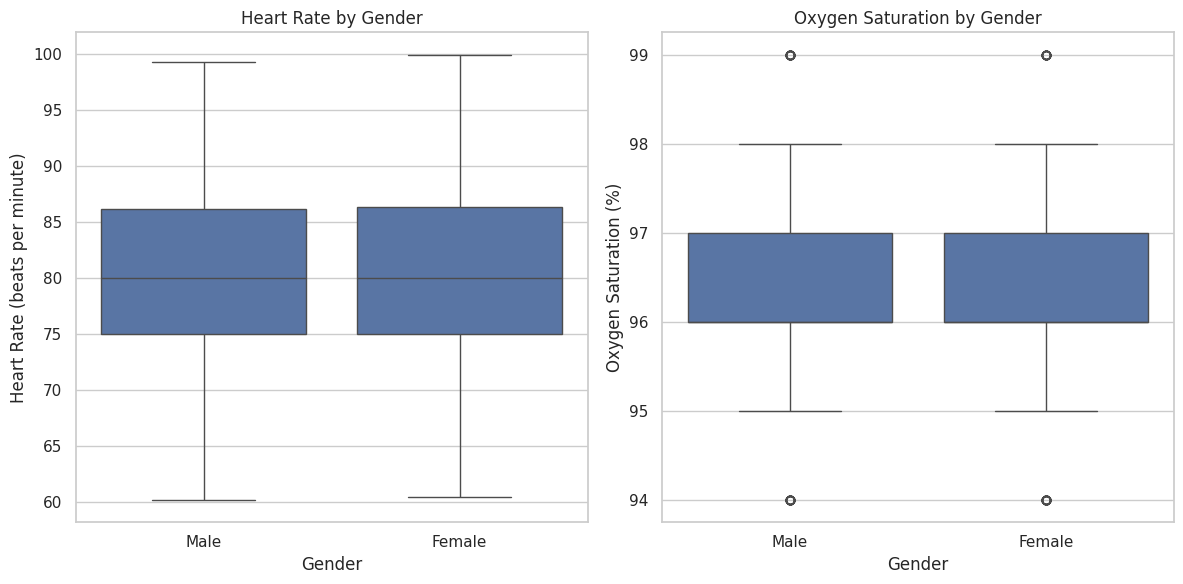

In [57]:
# extracting systolic and diastolic blood pressure for analysis
health_data[["SystolicBP", "DiastolicBP"]] = health_data["BloodPressure"].str.split("/", expand=True).astype(int)
print(health_data.head())

# blood pressure distribution
sns.histplot(data=health_data, x="SystolicBP", color="skyblue", label="Systolic", kde=True)
sns.histplot(data=health_data, x="DiastolicBP", color="red", label="Diastolic", kde=True)
plt.title("Blood Pressure Distribution by Gender")
plt.legend()
plt.show()

# health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

Observation 😃:   
- The systolic blood pressure, represented in blue, shows a more spread-out distribution with peaks suggesting common readings around 120 mmHg and 140 mmHg.
- The diastolic blood pressure, in red, appears to have a narrower distribution, with a significant peak around 80 mmHg.  
- The spread of systolic values is broader than the diastolic ones, which is typical as systolic pressure tends to vary more with factors like activity level and stress.  
- This distribution is consistent with general population trends where a systolic reading of around 120 mmHg and a diastolic reading of around 80 mmHg are considered normal.  

For heart rate, both males and females show similar median values with a relatively similar interquartile range, indicating no significant difference in heart rate between genders within this dataset. In terms of oxygen saturation, again, both genders exhibit nearly identical medians and interquartile ranges, suggesting that oxygen saturation does not differ notably between males and females in this sample. There are a few outliers in oxygen saturation for both genders, indicating a few individuals with lower than typical values, but these do not seem to affect the overall distribution significantly.

> Now, let's analyze heart rate and oxygen saturation by sleep quality and stress levels:

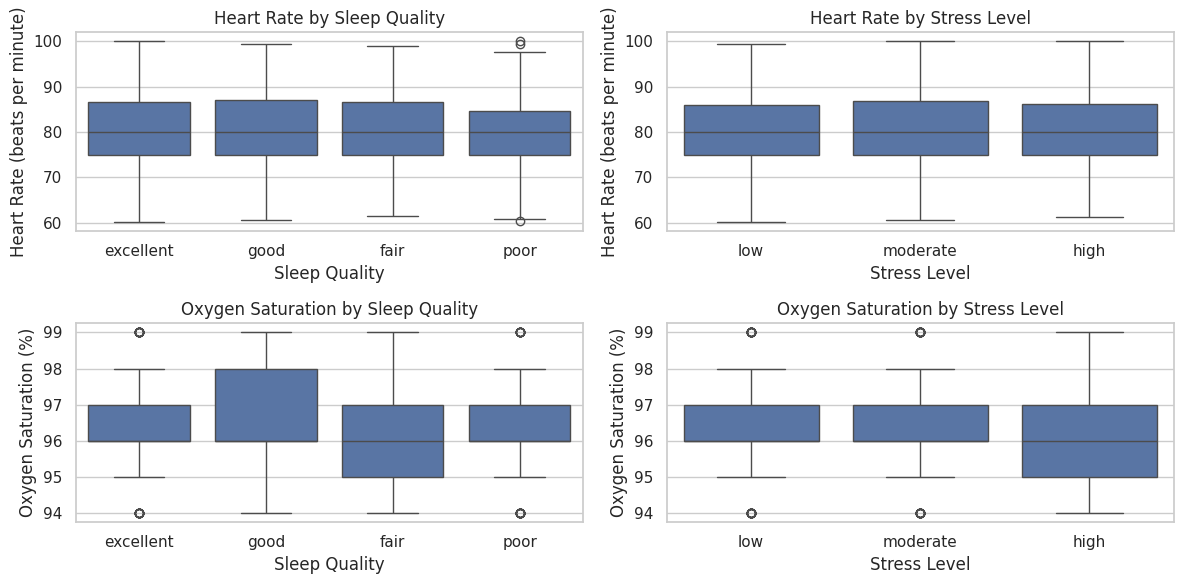

In [72]:
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

Heart rate appears relatively consistent across different levels of sleep quality and stress, with a slight increase in variation for those reporting poor sleep. Oxygen saturation shows a minimal decrease in median values from excellent to poor sleep quality, with some outliers indicating lower saturation for excellent and good sleep. When correlated with stress levels, oxygen saturation remains largely unchanged. Overall, while there are outliers, the central tendencies suggest that neither heart rate nor oxygen saturation is greatly affected by sleep quality or stress level within this dataset.

> Now, let’s analyze the respiratory rate and body temperature by activity levels:

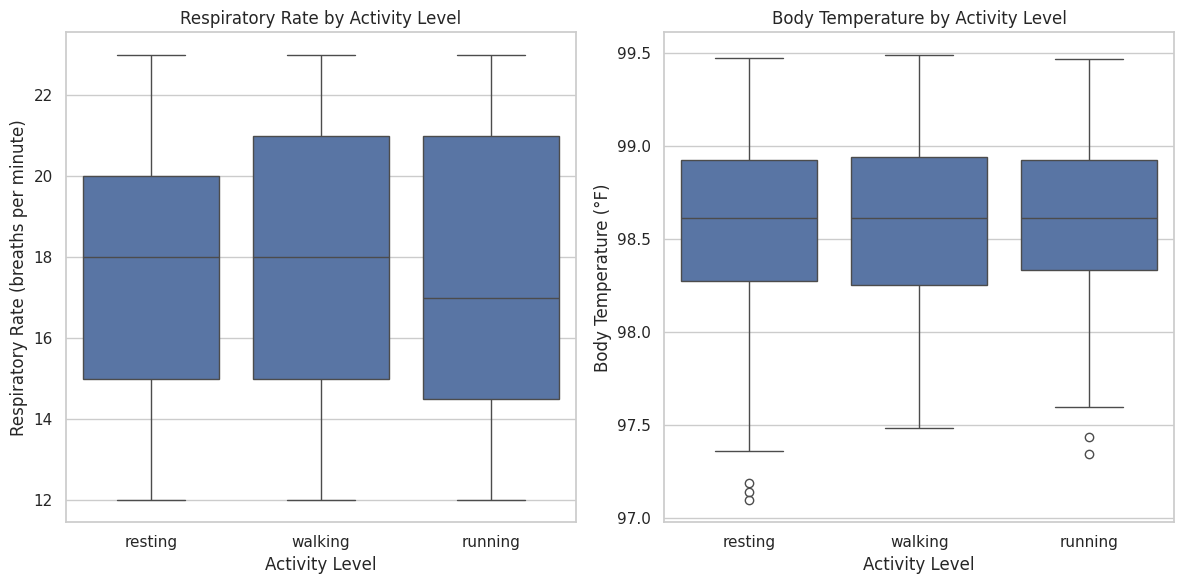

In [69]:
# creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

Observation ☁:  
The respiratory rate tends to increase with activity level, as indicated by higher median rates for walking and running compared to resting. It aligns with physiological responses to exercise, where the breathing rate increases to meet oxygen demands. For body temperature, there is a slight upward trend from resting to running, which is consistent with the body heating up during physical exertion. There are outliers in body temperature at the resting and running levels, suggesting some individuals have temperatures outside the typical range for these activities. Overall, the trends observed are in line with expected physiological responses to varying levels of activity.

## Data Preparation

### Grouping Patients
The data is not so complicated enough that we need to use a clustering algorithm to group patients. So, let’s group patients based on:

1. **Age Group:** Young, Middle-aged, Senior
2. **Blood Pressure Category:** Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2
3. **Heart Rate Category:** Low, Normal, High
4. **`Oxygen Saturation Category:`** Normal, Low

In [61]:
# function to categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# function to categorize Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# function to categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# applying categorizations
health_data['AgeGroup'] = health_data['Age'].apply(age_group)
health_data['BPCategory'] = health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HRCategory'] = health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory'] = health_data['OxygenSaturation'].apply(oxy_category)

print(health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


>Now, let’s visualize the groups:

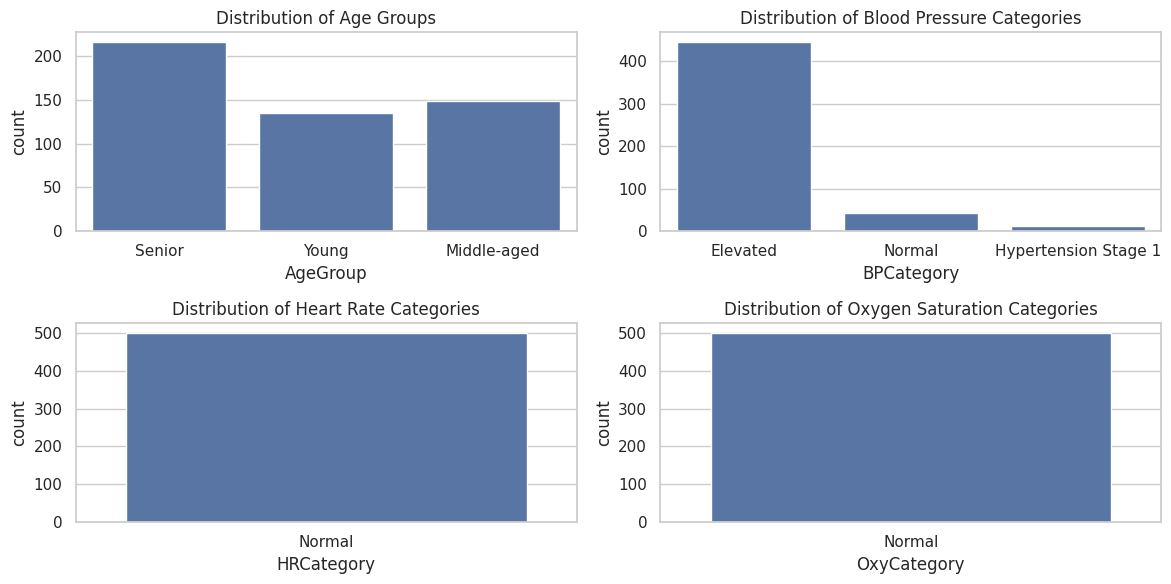

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Age Group count plot
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=health_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

**Observation**:
1. Distribution of Age Groups: The count plot shows that the ‘Senior’ category has the highest count, followed by the ‘Young’ and ‘Middle-aged’ categories. It suggests that seniors are the largest age group in this dataset.
2. Distribution of Blood Pressure Categories: The majority of the dataset falls under ‘Normal’ blood pressure, with fewer instances in the ‘Elevated’ and ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ has the lowest count, indicating that severe hypertension is less common among the participants.
3. Distribution of Heart Rate Categories: Most individuals have a ‘Normal’ heart rate, with very few falling into the ‘Low’ or ‘High’ categories. It indicates that most individuals in this dataset have a heart rate that falls within the expected range.
4. Distribution of Oxygen Saturation Categories: Almost everyone has ‘Normal’ oxygen saturation levels, with very few instances of ‘Low’ saturation. It suggests that oxygen deprivation is not a common issue in this group.

So, this is how you can perform Health Monitoring and Analysis using Python.

## Summary
>So, Health Monitoring and Analysis contains a range of activities from real-time physiological data collection (like heart rate, blood pressure, and temperature) to the analysis of more complex health records (including patient history, lifestyle choices, and genetic information).